In [76]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [77]:
from collections import Counter
from sklearn.cluster import DBSCAN
import pandas as pd
from src.utils_clustering import *
import time

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

In [78]:
N_CLASSES = 15

In [79]:
DATASET_FILE_NAME = "s1"
file_path = rf'..\data\processed\{DATASET_FILE_NAME}.txt'
processed_data = pd.read_csv(file_path)

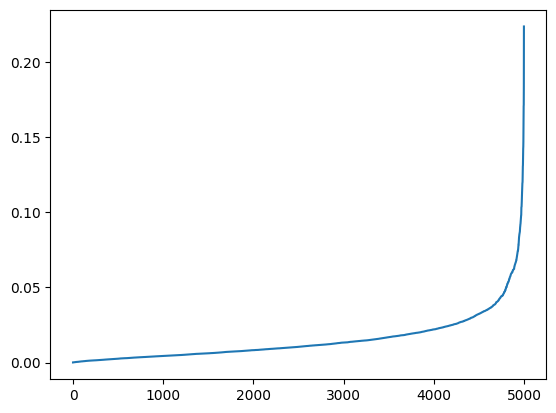

In [80]:
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(processed_data)

# Determine the optimal eps using the k-distance graph
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(scaled_data)
distances, indices = neighbors_fit.kneighbors(scaled_data)
distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.plot(distances)

plt.show()

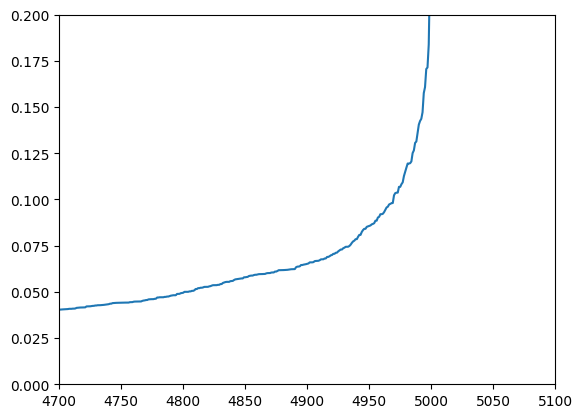

In [81]:
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(processed_data)

# Determine the optimal eps using the k-distance graph
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(scaled_data)
distances, indices = neighbors_fit.kneighbors(scaled_data)
distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.plot(distances)

plt.xlim(4700, 5100)  # Limit to the first 1000 points for x-axis
plt.ylim(0, 0.2)  # Adjust the y-axis to the range of interest
plt.show()

In [82]:
# Start measuring time
start_time = time.time()

dbscan_clustering = DBSCAN(eps=0.02128, min_samples=4)
labels_pred = dbscan_clustering.fit_predict(processed_data)

# Measure elapsed time
end_time = time.time()
running_time = end_time - start_time
running_time_in_seconds = running_time / 60
running_time_in_seconds

0.0004000385602315267

In [83]:
cluster_distribution = Counter(labels_pred)
print("Predicted Distribution: ",cluster_distribution)

Predicted Distribution:  Counter({15: 347, 16: 343, 4: 336, 9: 334, 11: 327, 2: 326, 8: 326, 10: 326, 13: 324, 6: 323, 17: 321, 7: 319, 3: 311, 5: 310, 0: 277, -1: 126, 1: 6, 18: 6, 14: 5, 19: 4, 12: 3})


In [84]:
LABELS_FILE_NAME = 's1-label'
labels_true = load_labels_from_file(rf'..\data\label\{LABELS_FILE_NAME}.pa', len(labels_pred))
cluster_distribution = Counter(labels_true)
print(cluster_distribution)

Counter({13: 350, 14: 350, 15: 350, 12: 349, 11: 347, 10: 342, 9: 341, 8: 338, 7: 334, 6: 326, 5: 325, 4: 318, 2: 316, 3: 314, 1: 300})


In [85]:
clustering_algorithm_name = 'DBSCAN_clustering'
dataset_name = DATASET_FILE_NAME
results_path = r'../results/metrics/results.csv'

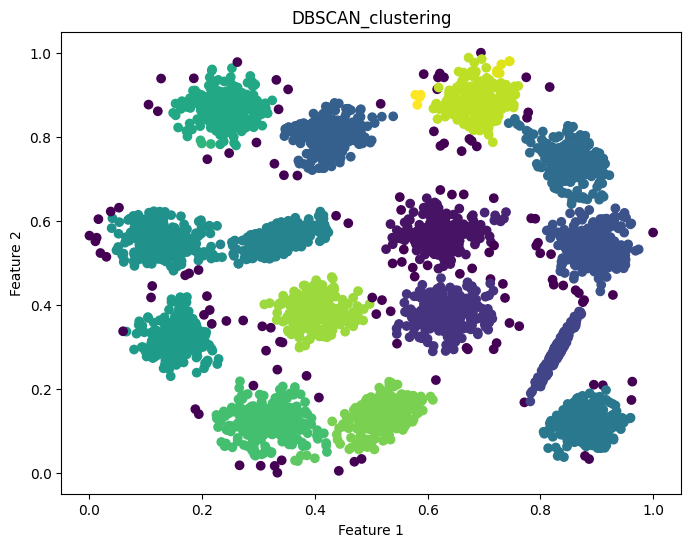

In [86]:
plot_clusters(processed_data, labels_pred, title=clustering_algorithm_name)

In [87]:
labels_pred = map_clusters_to_ground_truth_dbscan(labels_true, labels_pred)

Confusion Matrix:


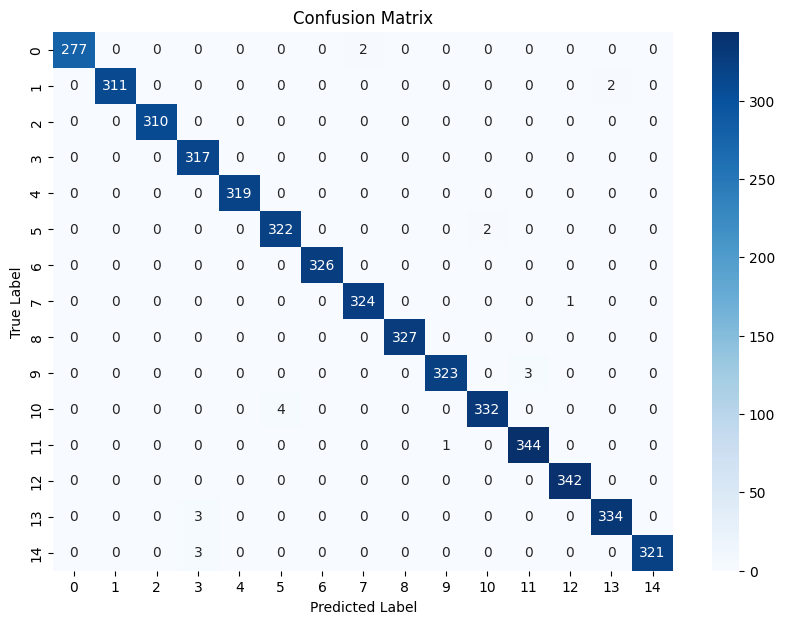


Overall Accuracy: 96.58%
This represents the proportion of all data points that were correctly grouped by the clustering algorithm.


In [88]:
generate_confusion_matrix(labels_true, labels_pred, N_CLASSES)

In [89]:
algorithm_params = dbscan_clustering.get_params()
algorithm_details = str(algorithm_params)

In [90]:
# Evaluate and save results
evaluate_clustering(X=processed_data, labels_true=labels_true, labels_pred=labels_pred,
                    clus_algo_name=clustering_algorithm_name, dataset_name=dataset_name, 
                    results_path=results_path, algorithm_details=algorithm_details, 
                    running_time=running_time)

Timestamp: 2024-02-07 12:59:07.745928
Dataset: s1
Clustering Algorithm: DBSCAN_clustering
Algorithm Details: {'algorithm': 'auto', 'eps': 0.02128, 'leaf_size': 30, 'metric': 'euclidean', 'metric_params': None, 'min_samples': 4, 'n_jobs': None, 'p': None}
Running Time (seconds): 0.0240023136138916
Accuracy: 0.9658
